https://medium.com/dair-ai/building-rnns-is-fun-with-pytorch-and-google-colab-3903ea9a3a79


In [0]:
!pip3 install torch torchvision


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np

In [0]:
class SingleRNN(nn.Module):
    def __init__(self, n_inputs, n_neurons):
        super(SingleRNN, self).__init__()
        
        self.Wx = torch.randn(n_inputs, n_neurons) # 4 X 1
        self.Wy = torch.randn(n_neurons, n_neurons) # 1 X 1
        
        self.b = torch.zeros(1, n_neurons) # 1 X 4
    
    def forward(self, X0, X1):
        self.Y0 = torch.tanh(torch.mm(X0, self.Wx) + self.b) # 4 X 1
        
        self.Y1 = torch.tanh(torch.mm(self.Y0, self.Wy) +
                            torch.mm(X1, self.Wx) + self.b) # 4 X 1
        
        return self.Y0, self.Y1

In [0]:
N_INPUT = 4
N_NEURONS = 1

X0_batch = torch.tensor([[0,1,2,0], [3,4,5,0], 
                         [6,7,8,0], [9,0,1,0]],
                        dtype = torch.float) #t=0 => 4 X 4

X1_batch = torch.tensor([[9,8,7,0], [0,0,0,0], 
                         [6,5,4,0], [3,2,1,0]],
                        dtype = torch.float) #t=1 => 4 X 4

model = SingleRNN(N_INPUT, N_NEURONS)

Y0_val, Y1_val = model(X0_batch, X1_batch)

In [0]:
rnn = nn.RNNCell(3, 5) # n_input X n_neurons

X_batch = torch.tensor([[[0,1,2], [3,4,5], 
                         [6,7,8], [9,0,1]],
                        [[9,8,7], [0,0,0], 
                         [6,5,4], [3,2,1]]
                       ], dtype = torch.float) # X0 and X1

hx = torch.randn(4, 5) # m X n_neurons
output = []

# for each time step
for i in range(2):
    hx = rnn(X_batch[i], hx)
    output.append(hx)

print(output)

[tensor([[ 0.9451,  0.8341, -0.2400,  0.6093,  0.3885],
        [ 0.9999,  0.7521,  0.3607, -0.4929, -0.9993],
        [ 1.0000,  0.8445, -0.1174, -0.8269, -1.0000],
        [ 0.9951, -0.5896, -0.9722,  0.2091, -0.9999]], grad_fn=<TanhBackward>), tensor([[ 1.0000,  0.8703, -0.9608, -0.9703, -1.0000],
        [ 0.7372,  0.5832, -0.5065,  0.2179,  0.8944],
        [ 1.0000,  0.9077, -0.9290, -0.9306, -0.9996],
        [ 0.9978, -0.1642, -0.4306, -0.2064, -0.6990]], grad_fn=<TanhBackward>)]


In [0]:
class CleanBasicRNN(nn.Module):
    def __init__(self, batch_size, n_inputs, n_neurons):
        super(CleanBasicRNN, self).__init__()
        
        rnn = nn.RNNCell(n_inputs, n_neurons)
        self.hx = torch.randn(batch_size, n_neurons) # initialize hidden state
        
    def forward(self, X):
        output = []

        # for each time step
        for i in range(2):
            self.hx = rnn(X[i], self.hx)
            output.append(self.hx)
        
        return output, self.hx

FIXED_BATCH_SIZE = 4 # our batch size is fixed for now
N_INPUT = 3
N_NEURONS = 5

X_batch = torch.tensor([[[0,1,2], [3,4,5], 
                         [6,7,8], [9,0,1]],
                        [[9,8,7], [0,0,0], 
                         [6,5,4], [3,2,1]]
                       ], dtype = torch.float) # X0 and X1


model = CleanBasicRNN(FIXED_BATCH_SIZE, N_INPUT, N_NEURONS)
output_val, states_val = model(X_batch)
print(output_val) # contains all output for all timesteps
print(states_val) # contains values for final state or final timestep, i.e., t=1

[tensor([[ 0.3950, -0.0498, -0.6019,  0.0867, -0.9354],
        [ 1.0000,  0.8841,  0.1893, -0.7005, -0.9950],
        [ 1.0000,  0.9186, -0.8622, -0.9921, -1.0000],
        [ 0.9999, -0.9075, -0.8457, -0.1751, -0.9967]], grad_fn=<TanhBackward>), tensor([[ 1.0000,  0.9104, -0.8933, -0.9771, -1.0000],
        [ 0.7948,  0.6600, -0.5623,  0.2044,  0.9190],
        [ 1.0000,  0.9220, -0.9225, -0.9095, -0.9991],
        [ 0.9983, -0.1749, -0.4835, -0.4116, -0.7551]], grad_fn=<TanhBackward>)]
tensor([[ 1.0000,  0.9104, -0.8933, -0.9771, -1.0000],
        [ 0.7948,  0.6600, -0.5623,  0.2044,  0.9190],
        [ 1.0000,  0.9220, -0.9225, -0.9095, -0.9991],
        [ 0.9983, -0.1749, -0.4835, -0.4116, -0.7551]], grad_fn=<TanhBackward>)


In [0]:
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 64

# list all transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

# download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

# download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
shuffle=False, num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 23473288.49it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 425755.40it/s]
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 6695020.17it/s]                           
8192it [00:00, 171592.78it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


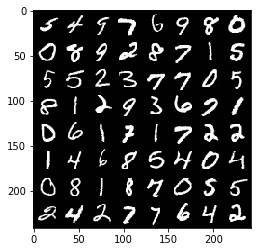

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [0]:
N_STEPS = 28
N_INPUTS = 28
N_NEURONS = 150
N_OUTPUTS = 10
N_EPHOCS = 10

In [0]:
class ImageRNN(nn.Module):
    def __init__(self, batch_size, n_steps, n_inputs, n_neurons, n_outputs):
        super(ImageRNN, self).__init__()
        
        self.n_neurons = n_neurons
        self.batch_size = batch_size
        self.n_steps = n_steps
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        
        self.basic_rnn = nn.RNN(self.n_inputs, self.n_neurons) 
        
        self.FC = nn.Linear(self.n_neurons, self.n_outputs)
        
    def init_hidden(self,):
        # (num_layers, batch_size, n_neurons)
        return (torch.zeros(1, self.batch_size, self.n_neurons))
        
    def forward(self, X):
        # transforms X to dimensions: n_steps X batch_size X n_inputs
        X = X.permute(1, 0, 2) 
        
        self.batch_size = X.size(1)
        self.hidden = self.init_hidden()
        
        lstm_out, self.hidden = self.basic_rnn(X, self.hidden)      
        out = self.FC(self.hidden)
        
        return out.view(-1, self.n_outputs) # batch_size X n_output

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
logits = model(images.view(-1, 28,28))
print(logits[0:10])

tensor([[ 0.1185, -0.0565,  0.0186,  0.0344, -0.1384, -0.0450, -0.0653,  0.1242,
          0.0080, -0.0272],
        [ 0.1163, -0.0420,  0.0190,  0.0318, -0.1342, -0.0497, -0.0701,  0.1327,
          0.0131, -0.0317],
        [ 0.0946, -0.0460,  0.0448,  0.0403, -0.0923, -0.0586, -0.0672,  0.1461,
          0.0165, -0.0250],
        [ 0.1116, -0.0701,  0.0458,  0.0314, -0.0941, -0.0554, -0.0719,  0.1953,
         -0.0050, -0.0156],
        [ 0.1016, -0.0406,  0.0395,  0.0342, -0.0908, -0.0507, -0.0610,  0.1644,
          0.0109, -0.0150],
        [ 0.0888, -0.0489,  0.0317,  0.0295, -0.1021, -0.0563, -0.0659,  0.1504,
          0.0098, -0.0150],
        [ 0.1002, -0.0433,  0.0446,  0.0276, -0.0963, -0.0503, -0.0664,  0.1634,
          0.0063, -0.0333],
        [ 0.0802, -0.0557,  0.0309,  0.0369, -0.1018, -0.0551, -0.0676,  0.1456,
          0.0114, -0.0178],
        [ 0.1000, -0.0501,  0.0438,  0.0413, -0.0951, -0.0571, -0.0679,  0.1435,
          0.0160, -0.0244],
        [ 0.0795, -

In [0]:
import torch.optim as optim

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Model instance
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [0]:
for epoch in range(N_EPHOCS):  # loop over the dataset multiple times
    train_running_loss = 0.0
    train_acc = 0.0
    model.train()
    
    # TRAINING ROUND
    for i, data in enumerate(trainloader):
         # zero the parameter gradients
        optimizer.zero_grad()
        
        # reset hidden states
        model.hidden = model.init_hidden() 
        
        # get the inputs
        inputs, labels = data
        inputs = inputs.view(-1, 28,28) 

        # forward + backward + optimize
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(outputs, labels, BATCH_SIZE)
         
    model.eval()
    print('Epoch:  %d | Loss: %.4f | Train Accuracy: %.2f'%(epoch, train_running_loss / i, train_acc/i))

Epoch:  0 | Loss: 0.7327 | Train Accuracy: 75.86
Epoch:  1 | Loss: 0.3263 | Train Accuracy: 89.89
Epoch:  2 | Loss: 0.2382 | Train Accuracy: 92.71
Epoch:  3 | Loss: 0.1960 | Train Accuracy: 94.00
Epoch:  4 | Loss: 0.1678 | Train Accuracy: 94.71
Epoch:  5 | Loss: 0.1575 | Train Accuracy: 95.07
Epoch:  6 | Loss: 0.1351 | Train Accuracy: 95.66
Epoch:  7 | Loss: 0.1277 | Train Accuracy: 95.90
Epoch:  8 | Loss: 0.1223 | Train Accuracy: 96.04
Epoch:  9 | Loss: 0.1124 | Train Accuracy: 96.34
